In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [3]:
data = [21.5, 19.9, 19.3, 11.8, 6, 5.1]
labels = ['торговля, ремонт транспорта', 'обрабатывающее производство', 'недвижка', 'транспорт и связь', 'здравохранение', 'строительство']

In [4]:
colors = sns.color_palette('deep')[0:6]

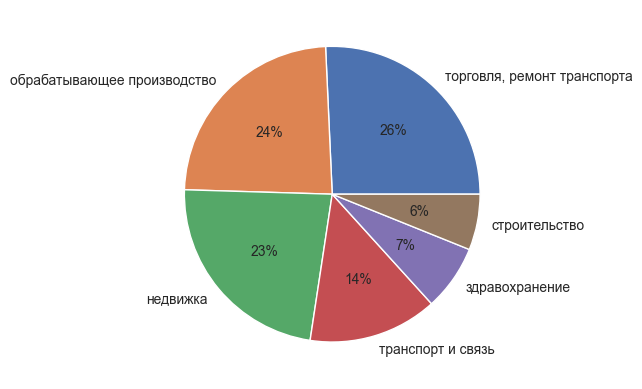

In [5]:
plt.pie(data, labels = labels, colors=colors, autopct='%.0f%%')
plt.show()

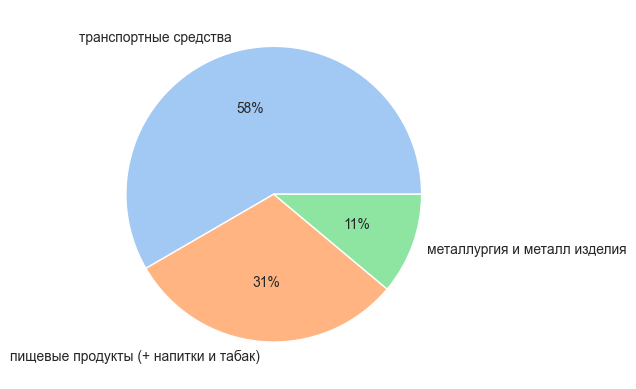

In [6]:
data = [ 30, 15.7, 5.7]
labels = ['транспортные средства', 'пищевые продукты (+ напитки и табак)', 'металлургия и металл изделия']
colors = sns.color_palette('pastel')[0:3]
plt.pie(data, labels = labels, colors=colors, autopct='%.0f%%')
plt.show()

In [7]:
df = pd.read_csv('russian_demography.csv')
df = df.dropna()
print(df.dtypes)

year              int64
region           object
npg             float64
birth_rate      float64
death_rate      float64
gdw             float64
urbanization    float64
dtype: object


In [8]:
df.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization
count,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000
mean,2003.583153,-2.344276,11.548207,13.901382,68.345166,69.375339
std,8.090156,6.066995,3.234236,3.499475,10.351930,13.081549
min,1990.000000,-15.900000,6.200000,3.200000,37.500000,23.630000
25%,1997.000000,-6.200000,9.300000,12.100000,61.335000,62.980000
50%,2004.000000,-3.100000,11.000000,14.100000,68.430000,69.670000
75%,2011.000000,0.700000,13.000000,16.100000,76.595000,77.695000
max,2017.000000,24.800000,29.900000,24.900000,95.050000,100.000000


In [9]:
11.548207 - 13.901382

-2.3531750000000002

mean среднее значение в области birth rate and death rate - 2, что означает что тенденция смертности выше, тенденции рождаемости с 1990 по 2017 год

/var/folders/lk/p4rmv9cx45d_zk5h2j11pwl40000gn/T/ipykernel_12426/3830777695.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


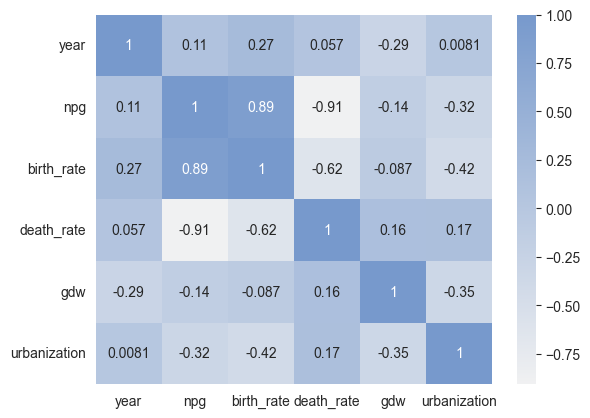

In [10]:
# Correlation between variables

cor = df.corr()
clrmap = sns.light_palette("#79C", reverse=False, as_cmap=True)

sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns, cmap=clrmap, annot=True)
sns.set(rc={'figure.figsize':(24,8)},font_scale=1.2)

general demographic weight (how many people of non-woking age account for 100 people of working age)

npg natural people growth

0.89 birth rate - npg
0.27 birth rate - year
0.17 death rate - urbanization
0.16 death rate - gdw
0.11 year - npg

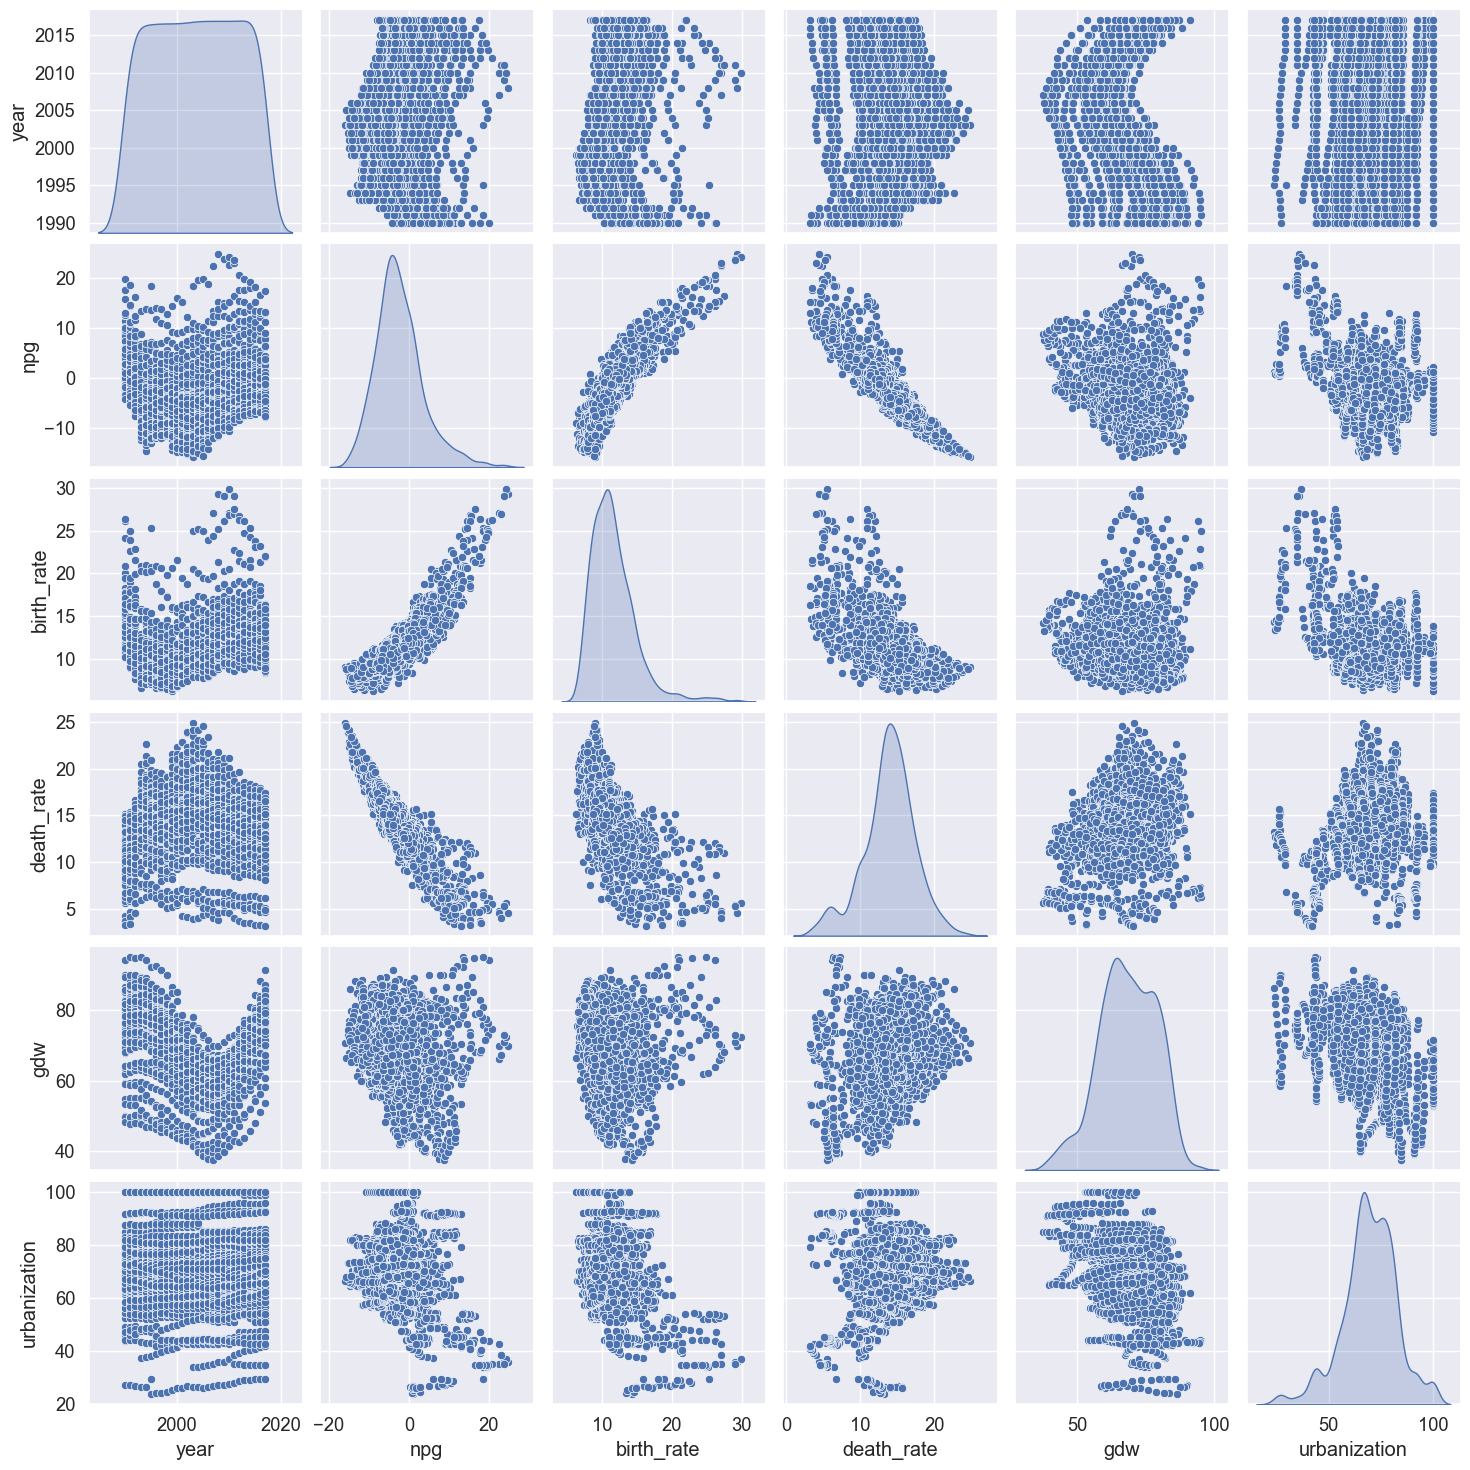

In [11]:
sns.pairplot(df, diag_kind='kde')

In [12]:
df.columns

Index(['year', 'region', 'npg', 'birth_rate', 'death_rate', 'gdw',
       'urbanization'],
      dtype='object')

In [13]:
columns = ['year', 'region', 'npg', 'birth_rate', 'death_rate', 'gdw', 'urbanization']

In [14]:
Q1=df[columns].quantile(0.25)
Q3=df[columns].quantile(0.75)
print(Q1)
print(Q3)

year            1997.000
npg               -6.200
birth_rate         9.300
death_rate        12.100
gdw               61.335
urbanization      62.980
Name: 0.25, dtype: float64
year            2011.000
npg                0.700
birth_rate        13.000
death_rate        16.100
gdw               76.595
urbanization      77.695
Name: 0.75, dtype: float64


/var/folders/lk/p4rmv9cx45d_zk5h2j11pwl40000gn/T/ipykernel_12426/2433363928.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df[columns].quantile(0.25)
/var/folders/lk/p4rmv9cx45d_zk5h2j11pwl40000gn/T/ipykernel_12426/2433363928.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df[columns].quantile(0.75)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['birth_rate'], df['npg'], test_size=0.2, random_state=0)

In [16]:
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (1852,)
X_test :  (463,)
y_train :  (1852,)
y_test :  (463,)


In [17]:
df['region'] = pd.factorize(df.region)[0]

In [18]:
X = df[['year', 'region', 'npg', 'birth_rate', 'death_rate', 'urbanization']]
y = df[['gdw']]

In [19]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [20]:
regr.score(X, y)

0.2713400301514943

In [21]:
regr.coef_

array([[-0.37866221, -0.01850685, -6.71715764,  6.65564407, -6.05901601,
        -0.30374623]])

In [22]:
regr.intercept_

array([840.47634679])

In [23]:
predictedDis = regr.predict([[2024, 59,2, 20, 18, 80]])
print(predictedDis)

[[59.28869927]]


/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
